In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
import matplotlib.pylab as plt
%matplotlib inline
import glob

In [2]:
v14_path = '/Users/yoachim/runs1.4/'
files = glob.glob('/Users/yoachim/runs/wfd_depth/*noddf*.db')


dirs = [file[:-3] for file in files]
snaps = [1]*len(files)
# snaps[0] = 2
pairs = ['mixed']*len(files)
# pairs[1] = 'same'

#dirs.append('/Users/yoachim/Temp/old_runs/baseline2018a_note')
#snaps.append(2)
#pairs.append('same')
dirs = [file for file in dirs if 'tracking' not in file]
files = [file for file in files if 'tracking' not in file]

In [3]:
files.sort()
files

['/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.65_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.70_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.75_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.80_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.85_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.90_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.95_noddf_v1.4_10yrs.db',
 '/Users/yoachim/runs/wfd_depth/wfd_depth_scale0.99_noddf_v1.4_10yrs.db']

In [4]:
results = {'fONv MedianNvis':[], 'fOArea': [], 'osf':[], 'nexp':[], 'fONv MinNvis':[]}
for directory in dirs:
    conn = sqlite3.connect(os.path.join(directory, 'resultsDb_sqlite.db'))
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MedianNvis";', conn)
    results['fONv MedianNvis'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fOArea";', conn)
    results['fOArea'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=3;', conn)
    results['osf'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=5;', conn)
    results['nexp'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MinNvis";', conn)
    results['fONv MinNvis'].append(np.max(df.values))
    
    conn.close()

In [5]:
keys = list(results.keys())
header = '| Run Name  |    '
for key in keys:
    header+= '%s |' % key

header += 'snaps |'
header += 'pairs |'
print(header)
print('| -- | -- | -- | -- | --| --| --|--|')
for i in range(len(dirs)):
    rn = os.path.basename(dirs[i])
    out = '| '
    out += rn +' |'
    for key in keys:
        out +='   %.3f  |' % results[key][i]
    out += '  %i |' % snaps[i]
    out += '  %s |' % pairs[i]
    print(out)
    

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| wfd_depth_scale0.85_noddf_v1.4_10yrs |   959.000  |   18232.815  |   0.758  |   2178260.000  |   890.000  |  1 |  mixed |
| wfd_depth_scale0.75_noddf_v1.4_10yrs |   881.000  |   17947.455  |   0.758  |   2179265.000  |   823.000  |  1 |  mixed |
| wfd_depth_scale0.80_noddf_v1.4_10yrs |   919.000  |   18195.886  |   0.758  |   2179591.000  |   852.000  |  1 |  mixed |
| wfd_depth_scale0.99_noddf_v1.4_10yrs |   1073.000  |   18459.424  |   0.759  |   2180903.000  |   1000.000  |  1 |  mixed |
| wfd_depth_scale0.70_noddf_v1.4_10yrs |   847.000  |   15174.429  |   0.759  |   2181211.000  |   811.000  |  1 |  mixed |
| wfd_depth_scale0.65_noddf_v1.4_10yrs |   826.000  |   9498.286  |   0.759  |   2181807.000  |   790.000  |  1 |  mixed |
| wfd_depth_scale0.95_noddf_v1.4_10yrs |   1039.000  |   18378.013  |   0.758  |   2178368.000  |   966.000  |  1 |  mixed |
| wfd_depth

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| wfd_depth_scale0.85_noddf_v1.4_10yrs |   959.000  |   18232.815  |   0.758  |   2178260.000  |   890.000  |  1 |  mixed |
| wfd_depth_scale0.75_noddf_v1.4_10yrs |   881.000  |   17947.455  |   0.758  |   2179265.000  |   823.000  |  1 |  mixed |
| wfd_depth_scale0.80_noddf_v1.4_10yrs |   919.000  |   18195.886  |   0.758  |   2179591.000  |   852.000  |  1 |  mixed |
| wfd_depth_scale0.99_noddf_v1.4_10yrs |   1073.000  |   18459.424  |   0.759  |   2180903.000  |   1000.000  |  1 |  mixed |
| wfd_depth_scale0.70_noddf_v1.4_10yrs |   847.000  |   15174.429  |   0.759  |   2181211.000  |   811.000  |  1 |  mixed |
| wfd_depth_scale0.65_noddf_v1.4_10yrs |   826.000  |   9498.286  |   0.759  |   2181807.000  |   790.000  |  1 |  mixed |
| wfd_depth_scale0.95_noddf_v1.4_10yrs |   1039.000  |   18378.013  |   0.758  |   2178368.000  |   966.000  |  1 |  mixed |
| wfd_depth_scale0.90_noddf_v1.4_10yrs |   998.000  |   18261.351  |   0.758  |   2178729.000  |   928.000  |  1 |  mixed |

In [6]:
# OK, let's package this up as a giant dataframe
array_list = []

names = keys.copy()
names.extend(['Run Name', 'snaps', 'pairs'])
types = [float]*len(keys)
types.extend(['|U40', int, '|U10'])

dt = list(zip(names, types))

for i in range(len(dirs)):
    arr = np.zeros(1, dtype=dt)
    arr['Run Name'] = os.path.basename(dirs[i])
    arr['snaps'] = snaps[i]
    arr['pairs'] = pairs[i]
    for key in keys:
        arr[key] =results[key][i]
    array_list.append(arr) 


In [7]:
data_array = np.concatenate(array_list)
data_array

array([ (  959.,  18232.81514857,  0.75798695,  2178260.,   890., 'wfd_depth_scale0.85_noddf_v1.4_10yrs', 1, 'mixed'),
       (  881.,  17947.4553092 ,  0.75834151,  2179265.,   823., 'wfd_depth_scale0.75_noddf_v1.4_10yrs', 1, 'mixed'),
       (  919.,  18195.88622818,  0.75844465,  2179591.,   852., 'wfd_depth_scale0.80_noddf_v1.4_10yrs', 1, 'mixed'),
       ( 1073.,  18459.42443277,  0.75886851,  2180903.,  1000., 'wfd_depth_scale0.99_noddf_v1.4_10yrs', 1, 'mixed'),
       (  847.,  15174.42910542,  0.75896312,  2181211.,   811., 'wfd_depth_scale0.70_noddf_v1.4_10yrs', 1, 'mixed'),
       (  826.,   9498.28618285,  0.75919783,  2181807.,   790., 'wfd_depth_scale0.65_noddf_v1.4_10yrs', 1, 'mixed'),
       ( 1039.,  18378.01294919,  0.75799288,  2178368.,   966., 'wfd_depth_scale0.95_noddf_v1.4_10yrs', 1, 'mixed'),
       (  998.,  18261.3511325 ,  0.75813203,  2178729.,   928., 'wfd_depth_scale0.90_noddf_v1.4_10yrs', 1, 'mixed')],
      dtype=[('fONv MedianNvis', '<f8'), ('fOArea', '<

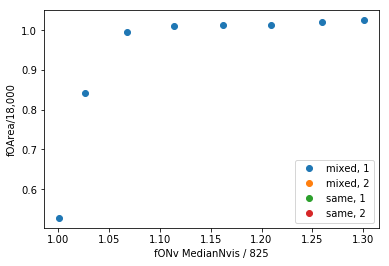

In [8]:
filters = ['mixed', 'same']
snaps = [1,2]

for filt in filters:
    for snap in snaps:
        good = np.where((data_array['snaps'] == snap) & (data_array['pairs'] == filt) )
        plt.plot(data_array['fONv MedianNvis'][good]/825., data_array['fOArea'][good]/18000, 'o', label=filt+', %i' % snap)
plt.xlabel('fONv MedianNvis / 825')
plt.ylabel('fOArea/18,000')
plt.legend()

In [9]:
df = pd.DataFrame(data_array)
df['nexp'] = np.round(df['nexp']/1e6*100)/100
df['fONv MedianNvis'] = np.round(df['fONv MedianNvis']/825*100)/100
df['fOArea'] = np.round(df['fOArea']/18000*100)/100
df['fONv MinNvis'] = np.round(df['fONv MinNvis']/825*100)/100


In [10]:
latex_table = df.to_latex(index=False, #float_format="%%.1f",
                          columns=['Run Name', 'fONv MedianNvis', 'fONv MinNvis', 'fOArea', 'nexp', 'snaps', 'pairs'])
print(latex_table)

\begin{tabular}{lrrrrrl}
\toprule
                             Run Name &  fONv MedianNvis &  fONv MinNvis &  fOArea &  nexp &  snaps &  pairs \\
\midrule
 wfd\_depth\_scale0.85\_noddf\_v1.4\_10yrs &             1.16 &          1.08 &    1.01 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.75\_noddf\_v1.4\_10yrs &             1.07 &          1.00 &    1.00 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.80\_noddf\_v1.4\_10yrs &             1.11 &          1.03 &    1.01 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.99\_noddf\_v1.4\_10yrs &             1.30 &          1.21 &    1.03 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.70\_noddf\_v1.4\_10yrs &             1.03 &          0.98 &    0.84 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.65\_noddf\_v1.4\_10yrs &             1.00 &          0.96 &    0.53 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.95\_noddf\_v1.4\_10yrs &             1.26 &          1.17 &    1.02 &  2.18 &      1 &  mixed \\
 wfd\_depth\_scale0.90\_no

In [11]:
#names2fracs = ['wfd_95_v1.3_10yrs', 'wfd_90_v1.3_10yrs','wfd_85_v1.3_10yrs','wfd_80_v1.3_10yrs', 'wfd_75_v1.3_10yrs',
#              'wfd_70_v1.3_10yrs','wfd_65_v1.3_10yrs']
#fracs = [float(name.split('_')[1]) for name in names2fracs]

fracs = [float(file.split('/')[-1].split('_scale')[-1].split('_')[0]) for file in files]
indices = [np.max(np.where(df['Run Name'].values == name.split('/')[-1][:-3])[0]) for name in files]



In [12]:
files[0].split('/')[-1], df['Run Name'].values

('wfd_depth_scale0.65_noddf_v1.4_10yrs.db',
 array(['wfd_depth_scale0.85_noddf_v1.4_10yrs',
        'wfd_depth_scale0.75_noddf_v1.4_10yrs',
        'wfd_depth_scale0.80_noddf_v1.4_10yrs',
        'wfd_depth_scale0.99_noddf_v1.4_10yrs',
        'wfd_depth_scale0.70_noddf_v1.4_10yrs',
        'wfd_depth_scale0.65_noddf_v1.4_10yrs',
        'wfd_depth_scale0.95_noddf_v1.4_10yrs',
        'wfd_depth_scale0.90_noddf_v1.4_10yrs'], dtype=object))

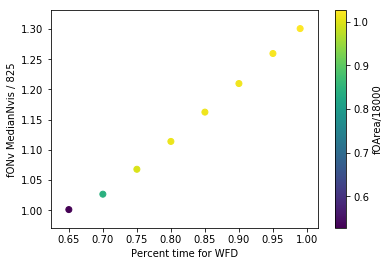

In [13]:
plt.scatter(fracs, data_array['fONv MedianNvis'][indices]/825., c= data_array['fOArea'][indices]/18000)
cb = plt.colorbar()
cb.set_label('fOArea/18000')
plt.xlabel('Percent time for WFD')
plt.ylabel('fONv MedianNvis / 825')


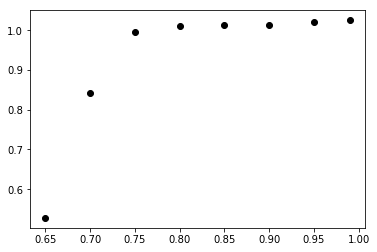

In [14]:
plt.plot(fracs, data_array['fOArea'][indices]/18000, 'ko')


In [37]:
fracs= np.array(fracs)
good = np.where(fracs > .74)
lfit = np.polyfit(fracs[good], data_array['fONv MedianNvis'][indices][good]/825., deg=1)

frac_fit = np.arange(0.75, 1.04, .05)
fO_fit = frac_fit*lfit[0] + lfit[1]

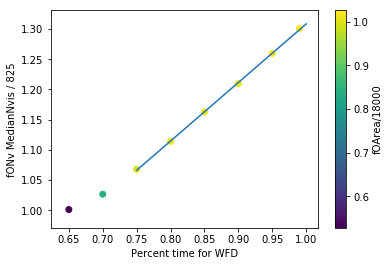

In [38]:
plt.scatter(fracs, data_array['fONv MedianNvis'][indices]/825., c= data_array['fOArea'][indices]/18000)
cb = plt.colorbar()
cb.set_label('fOArea/18000')
plt.xlabel('Percent time for WFD')
plt.ylabel('fONv MedianNvis / 825')

plt.plot(frac_fit, fO_fit)

In [44]:

print('final fO value if we put all time into WFD = %f' % fO_fit[-1])

final fO value if we put all time into WFD = 1.308336


In [45]:
frac_fit, fO_fit

(array([ 0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ]),
 array([ 1.06620528,  1.11463148,  1.16305767,  1.21148387,  1.25991007,
         1.30833627]))